In [11]:
import os
import cv2
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

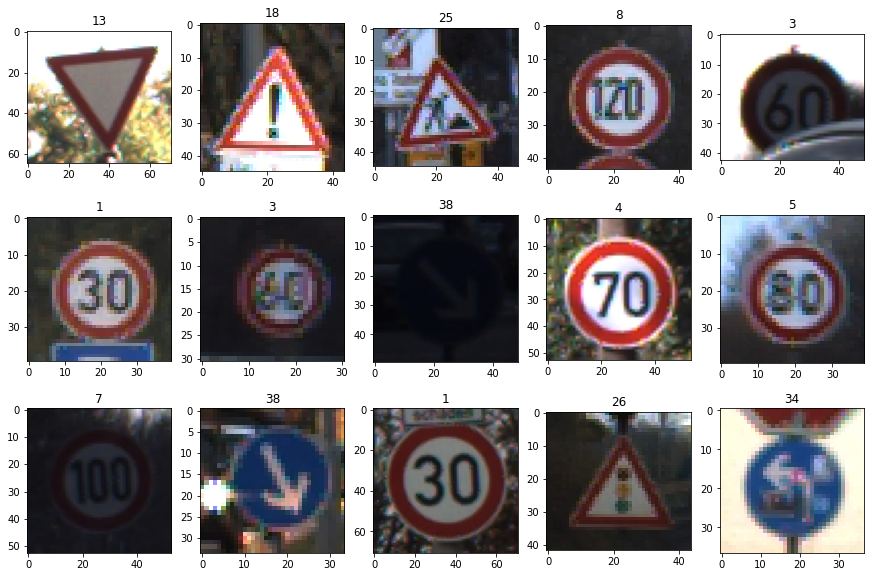

In [5]:
# Load the training labels
root = '../Data/dataset/' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)
#print(data[0])

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

In [9]:
# Extract class identifiers
# Hint: Check the csv 
ids = data.ClassId

20


[(0, 210), (1, 2220), (2, 2250), (3, 1410), (4, 1980), (5, 1860), (6, 420), (7, 1440), (8, 1410), (9, 1470), (10, 2010), (11, 1320), (12, 2100), (13, 2160), (14, 780), (15, 630), (16, 420), (17, 1110), (18, 1200), (19, 210), (20, 360), (21, 330), (22, 390), (23, 510), (24, 270), (25, 1500), (26, 600), (27, 240), (28, 540), (29, 270), (30, 450), (31, 780), (32, 240), (33, 689), (34, 420), (35, 1200), (36, 390), (37, 210), (38, 2070), (39, 300), (40, 360), (41, 240), (42, 240)]


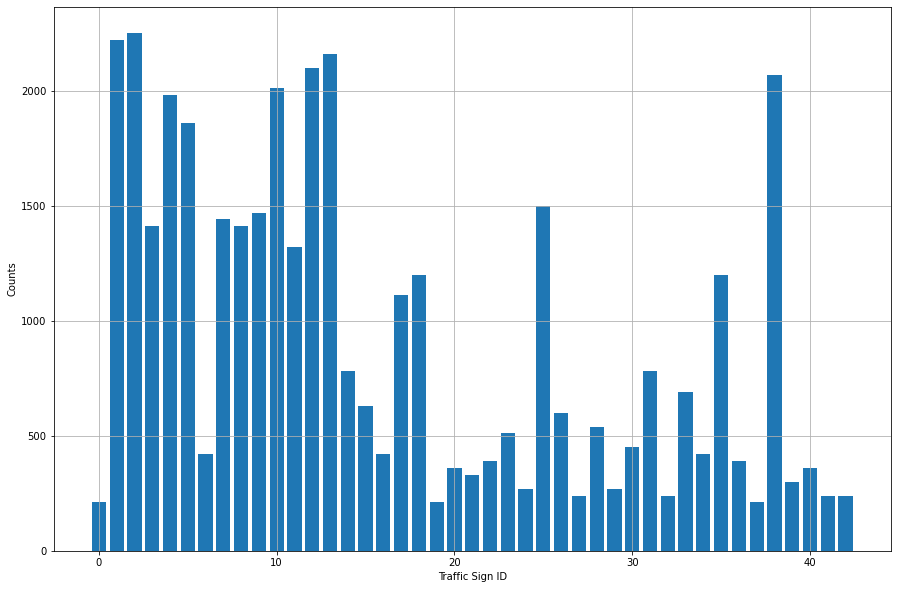

In [66]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
print(sorted(Counter(ids).items()))

**Answers**

    The database is not balanced because the number of images for different classes varies greatly.
    An example of an under-represented and an over-represented clases would be a class with id 0 and 1 where 210 and 2220 images respectively.


In [60]:
# Extract image sizes
imgs_w = data.Width
imgs_h = data.Height

Text(0.5, 0, 'Aspect Ratio')

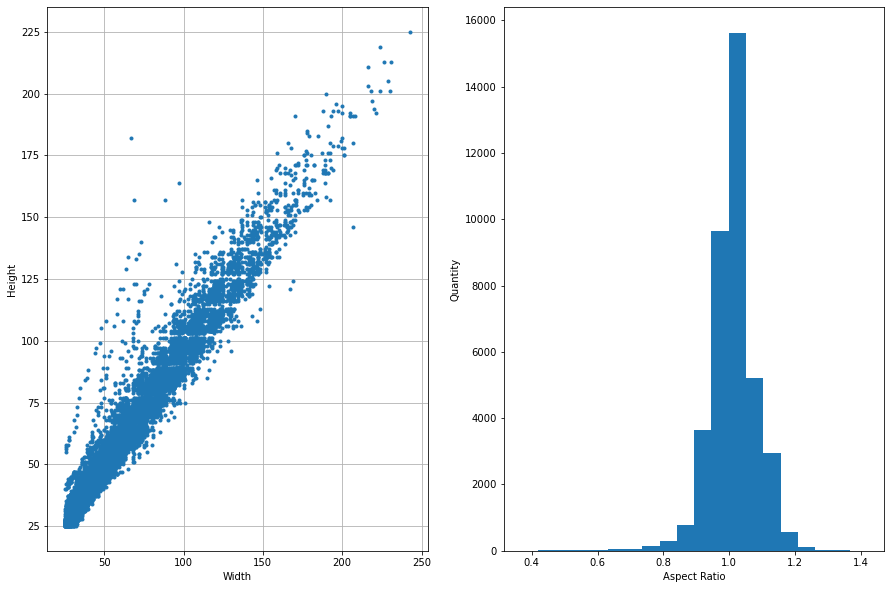

In [69]:
# Show images resolution distribution
imgs_p = imgs_w / imgs_h # Width to Height Ratio
plt.subplot(1,2,1)
plt.plot(imgs_w, imgs_h, '.'), plt.grid(True)
plt.xlabel('Width'), plt.ylabel('Height')

counts, bins = np.histogram(imgs_p, bins=20)
plt.subplot(1,2,2)
plt.hist(bins[:-1], bins, weights=counts)
plt.ylabel('Quantity')
plt.xlabel('Aspect Ratio')

In [62]:
# Calculate mean image brightness
img_avg = []
for idx in range(num_samples):#
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_avg.append(np.mean(img))

Text(0.5, 0, 'Avg Brightness')

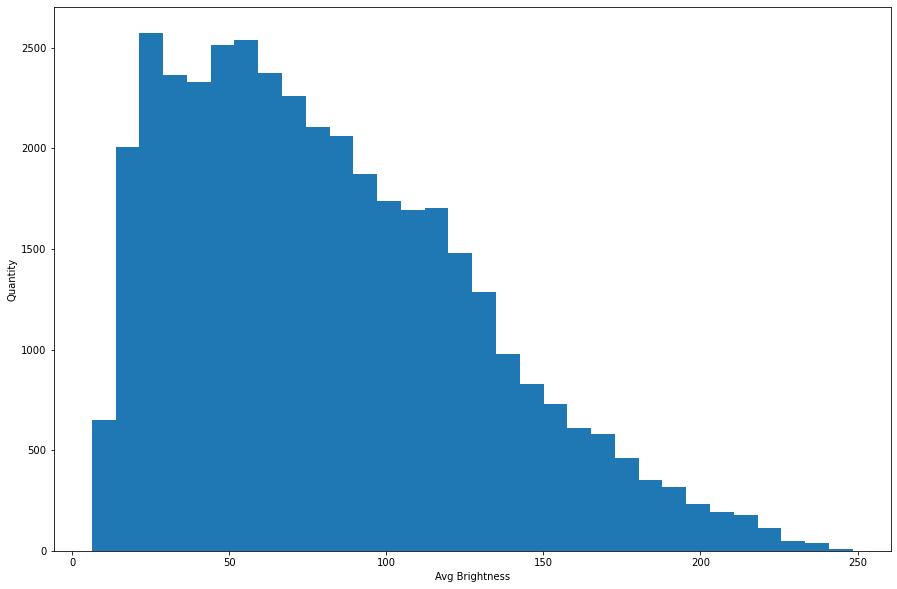

In [68]:
# Show images brightness distribution
counts, bins = np.histogram(img_avg, bins=32)
plt.hist(bins[:-1], bins, weights=counts)
plt.ylabel('Quantity')
plt.xlabel('Avg Brightness')

Comments:
* There is rather big resolution distribution in the database, but aspect ratio distribution is negligible. Therefore, we can resize images to the median resolution or to the other size, optimal for our network.
* The distribution of brightness is very large. There are both very dark pictures and very light ones. Therefore, it is advisable to normalize the brightness of the images. And perform histogram equalization.